## **Descripción de las Variables**

### **Variables Numéricas (mediciones de laboratorio)**
- **CellSize** *(µm)* → Tamaño de la célula en micrómetros. 
- **CellShape** *(ratio)* → Relación de aspecto de la célula. 
- **NucleusDensity** *(g/cm³)* → Densidad del núcleo celular. 
- **ChromatinTexture** *(unidades arbitrarias)* → Textura de la cromatina. 
- **CytoplasmSize** *(µm)* → Tamaño del citoplasma.
- **CellAdhesion** *(0-1)* → Capacidad de adhesión celular. *(0: baja, 1: alta)*  
- **MitosisRate** *(eventos/unidad de tiempo)* → Frecuencia de mitosis observada.
- **NuclearMembrane** *(1-5)* → Estado de la membrana nuclear *(1: frágil, 5: íntegra)*.  
- **GrowthFactor** *(ng/mL)* → Concentración de factores de crecimiento.
- **OxygenSaturation** *(%)* → Nivel de oxigenación de la célula. 
- **Vascularization** *(0-10)* → Índice de vascularización celular. 
- **InflammationMarkers** *(0-100)* → Nivel de marcadores inflamatorios.

### **Variables Categóricas**
- **CellType** → Clasificación del tipo celular. *(`Epithelial`, `Mesenchymal`, `Unknown`)*  
- **GeneticMutation** → Presencia de mutaciones genéticas. *(`Present`, `Absent`, `Unknown`)*  

### **Variable Objetivo**
- **Diagnosis** *(0/1)* → Indica si la célula presenta características compatibles con la condición médica estudiada.  
  - `0` → Célula sin anomalías.  
  - `1` → Célula con características anómalas.  

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Trabajo Práctico 2: Clasificación y Ensemble Learning
# Autor: Matteo Musacchio

# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown
from Problema_1.src.data_splitting import train_val_split
from Problema_1.src.preprocessing import handle_missing_values, one_hot_encoding, handle_outliers,min_max_normalize
from Problema_1.src.utils import pretty_print_df

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')  # Actualizado para versiones recientes de seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Definimos la ruta base del proyecto
BASE_PATH = r'c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP2'

# Problema 1: Diagnóstico de Cáncer de Mama
display(Markdown("## Problema 1: Diagnóstico de Cáncer de Mama"))

# 1.1 Análisis Exploratorio de Datos
cell_balanced_dev = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_dev.csv'))
cell_balanced_test = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_test.csv'))
cell_imbalanced_dev = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_dev_imbalanced.csv'))
cell_imbalanced_test = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_test_imbalanced.csv'))

## Problema 1: Diagnóstico de Cáncer de Mama

### Análisis del dataset de desarrollo

#### Información general del dataset

### Información del dataset

| Columnas            | Tipo de dato   |   No nulos |
|:--------------------|:---------------|-----------:|
| CellSize            | float64        |       1333 |
| CellShape           | float64        |       1347 |
| NucleusDensity      | float64        |       1362 |
| ChromatinTexture    | float64        |       1366 |
| CytoplasmSize       | float64        |       1347 |
| CellAdhesion        | float64        |       1369 |
| MitosisRate         | float64        |       1343 |
| NuclearMembrane     | float64        |       1343 |
| GrowthFactor        | float64        |       1359 |
| OxygenSaturation    | float64        |       1375 |
| Vascularization     | float64        |       1347 |
| InflammationMarkers | float64        |       1358 |
| Diagnosis           | float64        |       1663 |
| CellType            | object         |       1407 |
| GeneticMutation     | object         |       1663 |

#### Estadísticas descriptivas

### Estadísticas descriptivas

|   CellSize |   CellShape |   NucleusDensity |   ChromatinTexture |   CytoplasmSize |   CellAdhesion |   MitosisRate |   NuclearMembrane |   GrowthFactor |   OxygenSaturation |   Vascularization |   InflammationMarkers |   Diagnosis |
|-----------:|------------:|-----------------:|-------------------:|----------------:|---------------:|--------------:|------------------:|---------------:|-------------------:|------------------:|----------------------:|------------:|
|  1333      | 1347        |       1362       |          1366      |       1347      |    1369        |    1343       |        1343       |      1359      |          1375      |       1347        |             1358      | 1663        |
|    83.2471 |    0.598657 |          2.09734 |            26.095  |         33.9898 |       0.5488   |       5.32648 |           2.82537 |        74.1264 |            93.1994 |          5.96802  |               47.726  |    0.450391 |
|   100.317  |    0.565438 |          4.98757 |            24.8422 |         32.8096 |       0.612232 |      11.5725  |           2.69796 |        77.8195 |            82.5742 |          5.64953  |               44.1337 |    0.497683 |
|  -100      |   -1.41304  |         -3       |            10      |          5      |      -4.46175  |     -50       |          -3.43899 |       -50      |           -10      |         -0.997057 |                0      |    0        |
|    66.5721 |    0.479758 |          1.39701 |            21.2791 |         26.3045 |       0.4564   |       2.77673 |           2.2545  |        58.1704 |            79.1306 |          4.78247  |               37.514  |    0        |
|    69.7043 |    0.498832 |          1.44503 |            22.0668 |         28.4483 |       0.474836 |       3.08025 |           2.41446 |        60.994  |            79.9873 |          5.0681   |               40.8592 |    0        |
|    72.6531 |    0.523018 |          1.48565 |            22.8233 |         30.5068 |       0.494613 |       3.42307 |           2.53434 |        63.0416 |            80.9869 |          5.34646  |               43.9135 |    1        |
|  1000      |    5.04857  |         50       |           263.793  |        299.351  |       5.02993  |     100       |          24.8718  |       563.623  |           807.181  |         54.5124   |              440.902  |    1        |

#### Valores faltantes por columna

|                     |   Missing Values |   Percentage |
|:--------------------|-----------------:|-------------:|
| CellSize            |              330 |      19.8437 |
| NuclearMembrane     |              320 |      19.2423 |
| MitosisRate         |              320 |      19.2423 |
| CellShape           |              316 |      19.0018 |
| CytoplasmSize       |              316 |      19.0018 |
| Vascularization     |              316 |      19.0018 |
| InflammationMarkers |              305 |      18.3403 |
| GrowthFactor        |              304 |      18.2802 |
| NucleusDensity      |              301 |      18.0998 |
| ChromatinTexture    |              297 |      17.8593 |
| CellAdhesion        |              294 |      17.6789 |
| OxygenSaturation    |              288 |      17.3181 |
| CellType            |              256 |      15.3939 |

#### Distribución de la variable objetivo (Diagnosis)

|   Diagnosis |   Cantidad |   Porcentaje |
|------------:|-----------:|-------------:|
|           0 |        914 |        54.96 |
|           1 |        749 |        45.04 |

#### Distribución de variables categóricas

#### Matriz de correlación

#### Correlación de las variables con el target (Diagnosis)

|                     |   Diagnosis |
|:--------------------|------------:|
| Diagnosis           |  1          |
| CytoplasmSize       |  0.0704579  |
| GrowthFactor        |  0.0656154  |
| CellSize            |  0.0636151  |
| OxygenSaturation    |  0.0237426  |
| CellShape           |  0.0199661  |
| Vascularization     |  0.00550234 |
| NucleusDensity      | -0.00147981 |
| ChromatinTexture    | -0.00554875 |
| CellAdhesion        | -0.0113413  |
| MitosisRate         | -0.046265   |
| NuclearMembrane     | -0.0698478  |
| InflammationMarkers | -0.075421   |

#### Detección de outliers en variables numéricas

### Detección de outliers

| Variable            |   Outliers | Porcentaje   |
|:--------------------|-----------:|:-------------|
| CellSize            |         88 | 5.29%        |
| CellShape           |         87 | 5.23%        |
| NucleusDensity      |        115 | 6.92%        |
| ChromatinTexture    |         65 | 3.91%        |
| CytoplasmSize       |         61 | 3.67%        |
| CellAdhesion        |         84 | 5.05%        |
| MitosisRate         |        109 | 6.55%        |
| NuclearMembrane     |         78 | 4.69%        |
| GrowthFactor        |         94 | 5.65%        |
| OxygenSaturation    |         90 | 5.41%        |
| Vascularization     |         73 | 4.39%        |
| InflammationMarkers |         53 | 3.19%        |

Análisis exploratorio completado. Se han generado visualizaciones en la carpeta del proyecto.

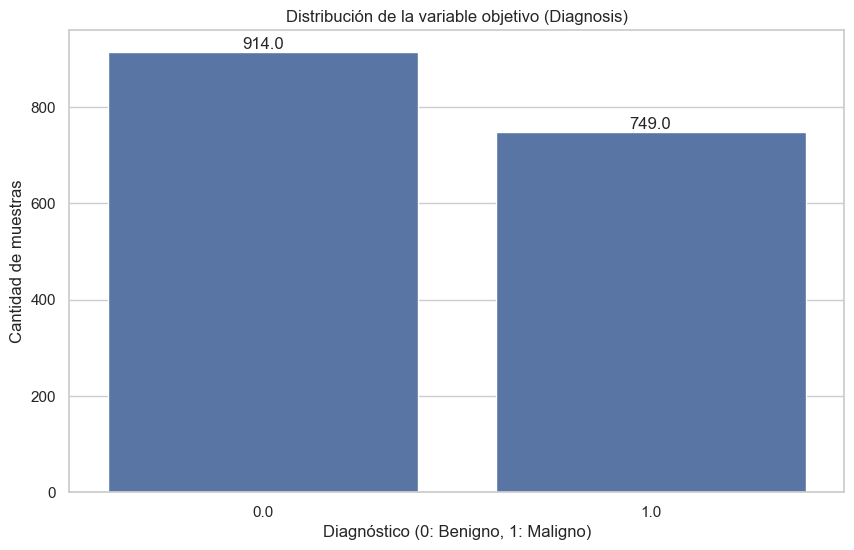

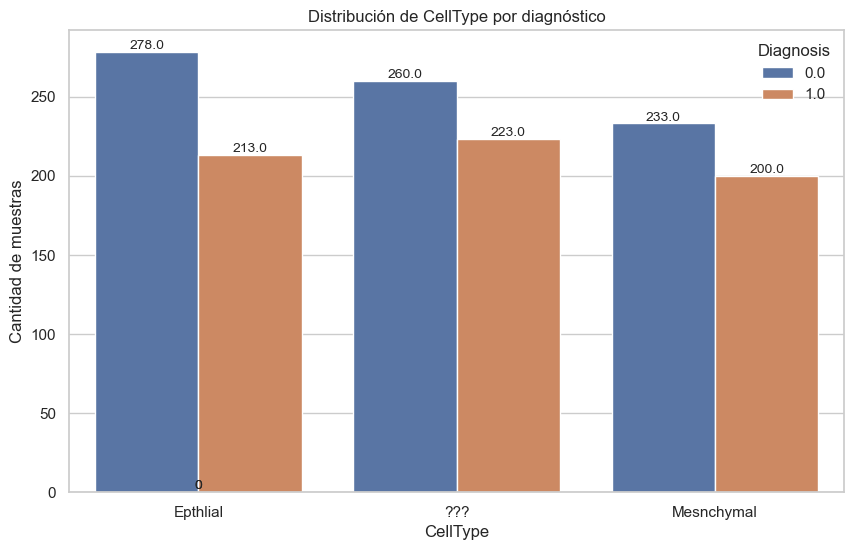

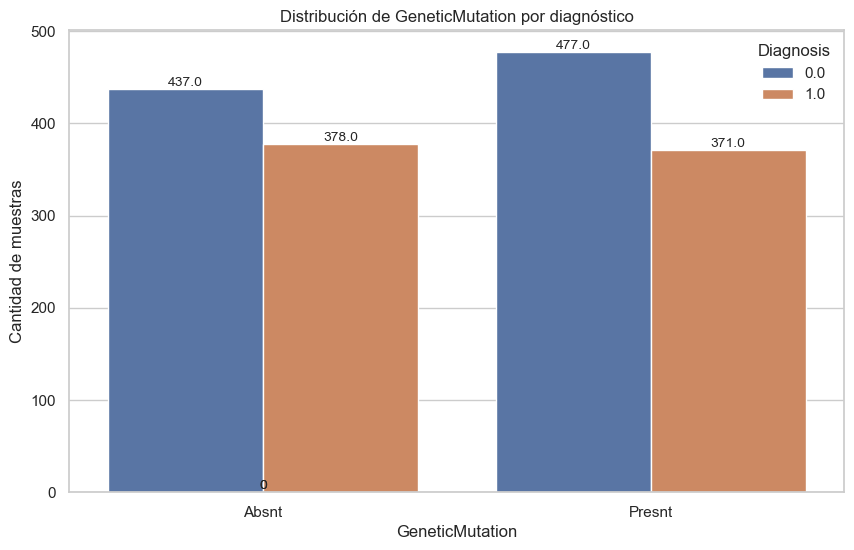

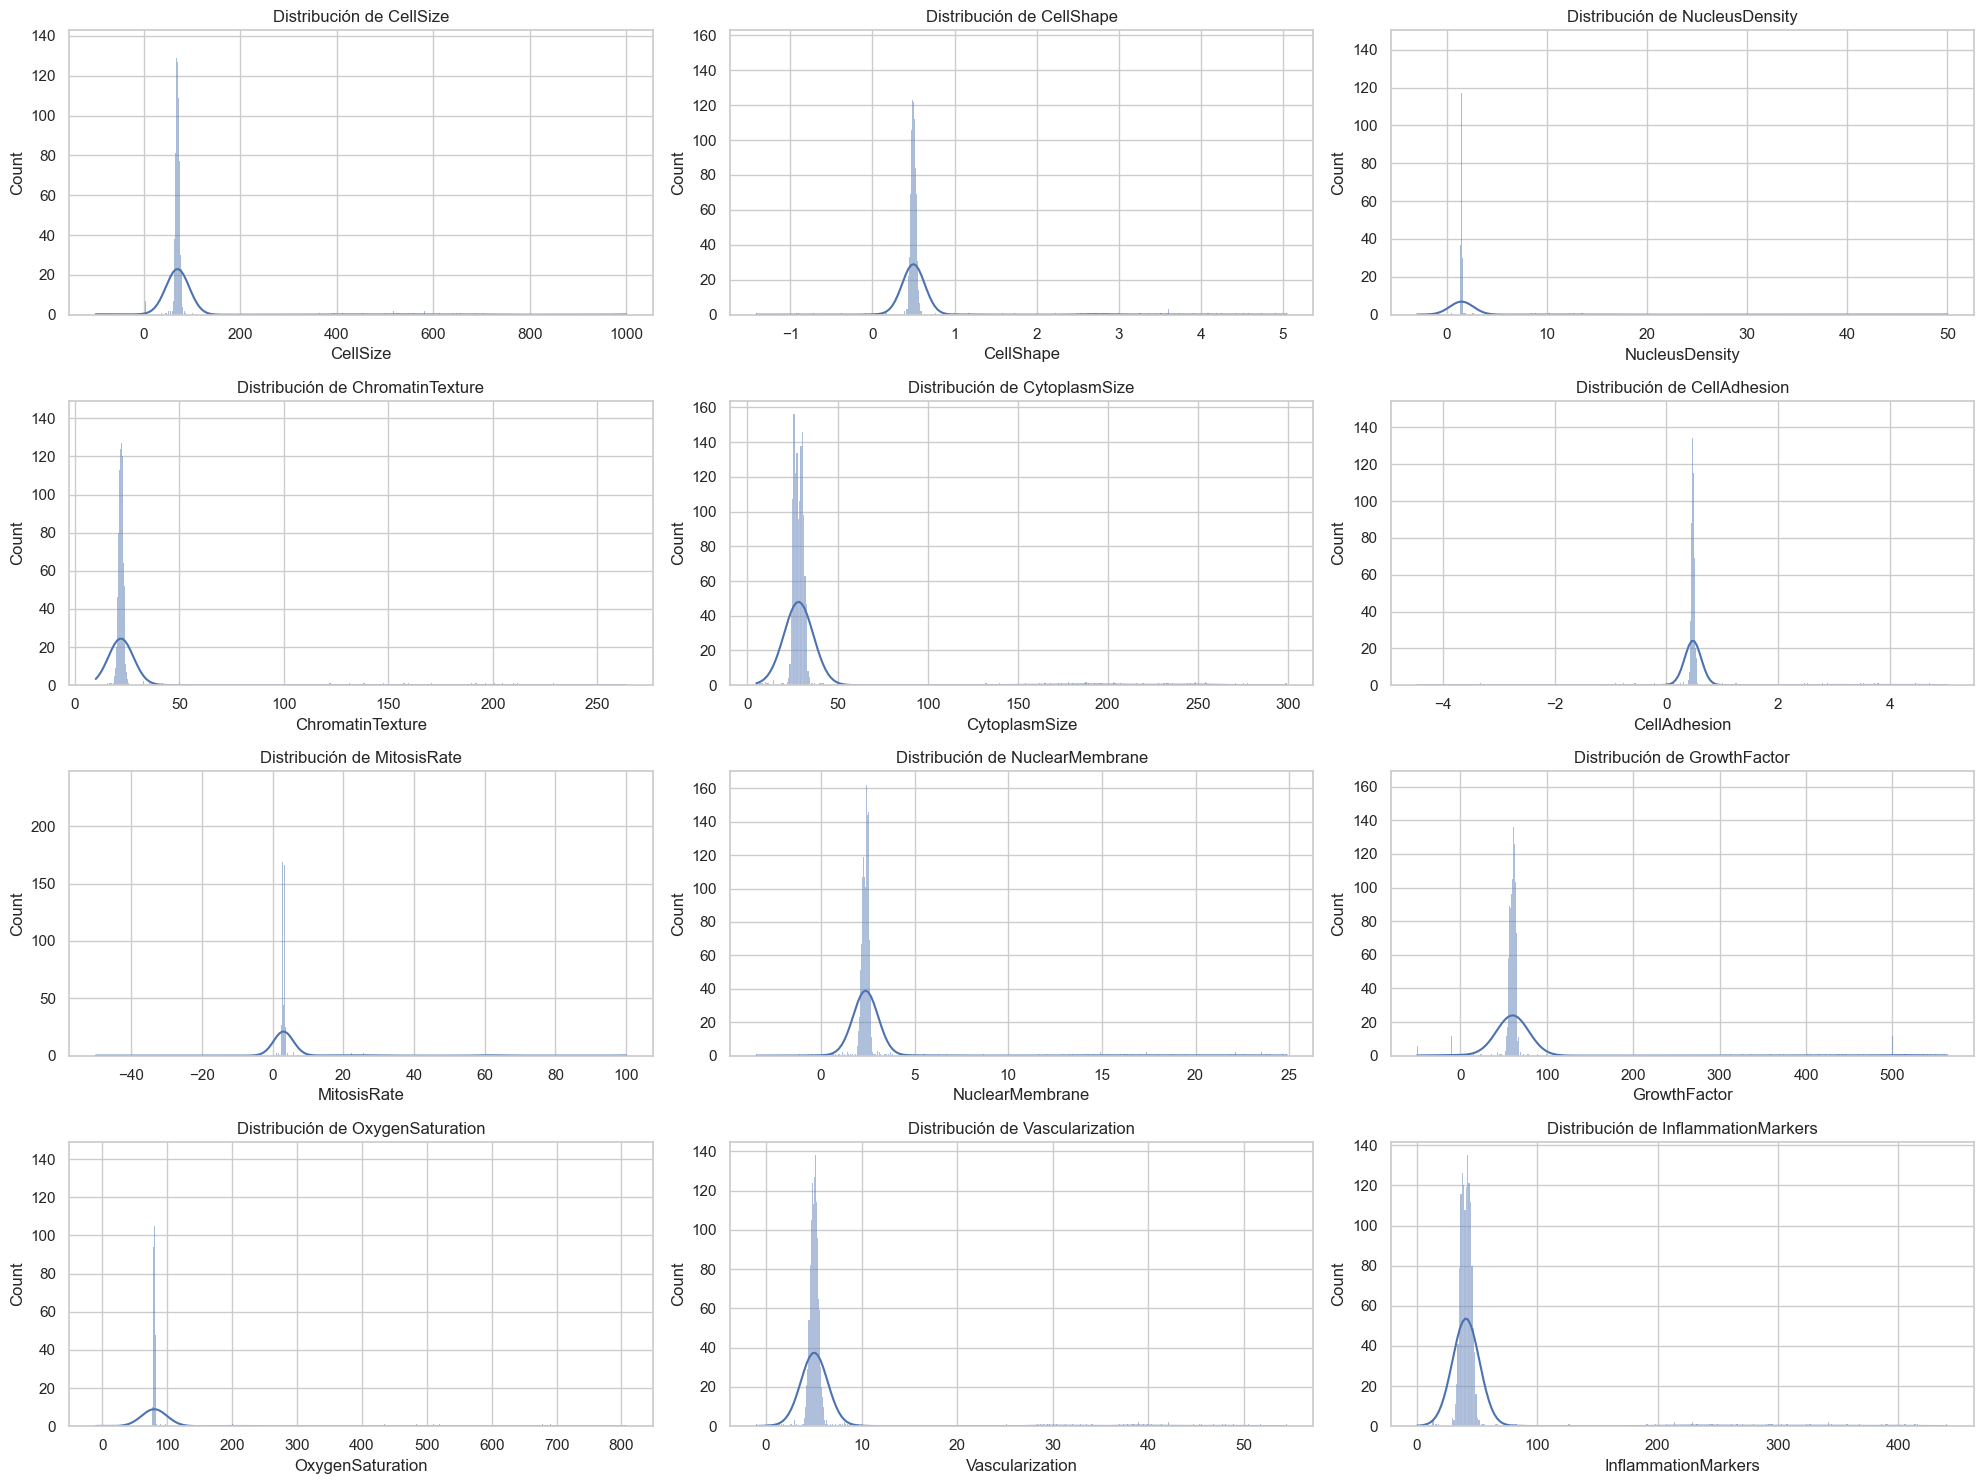

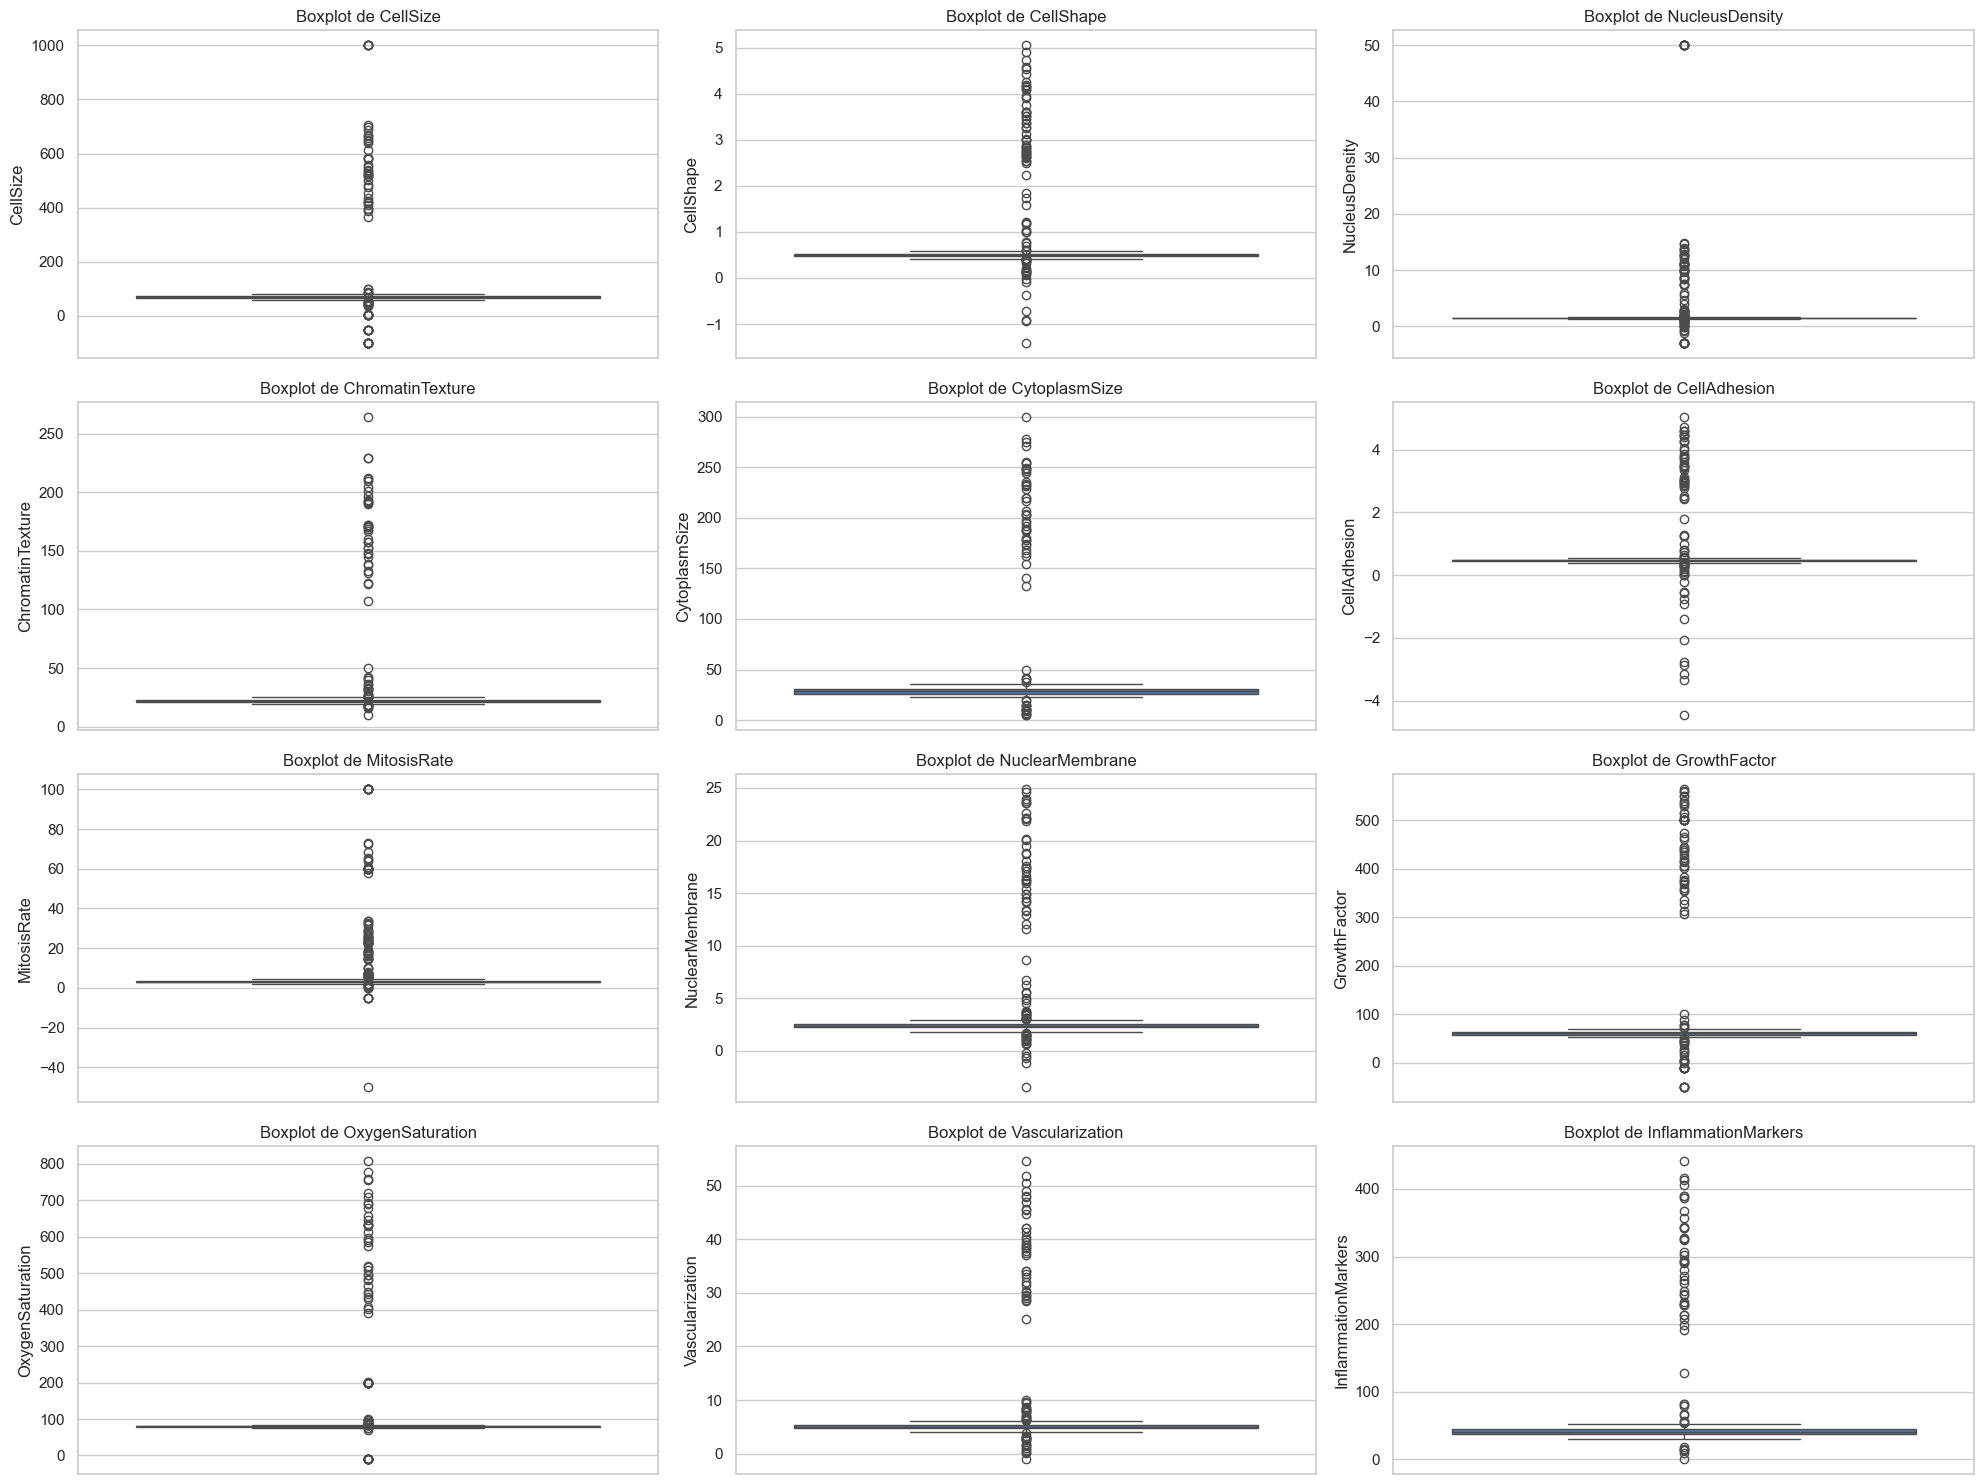

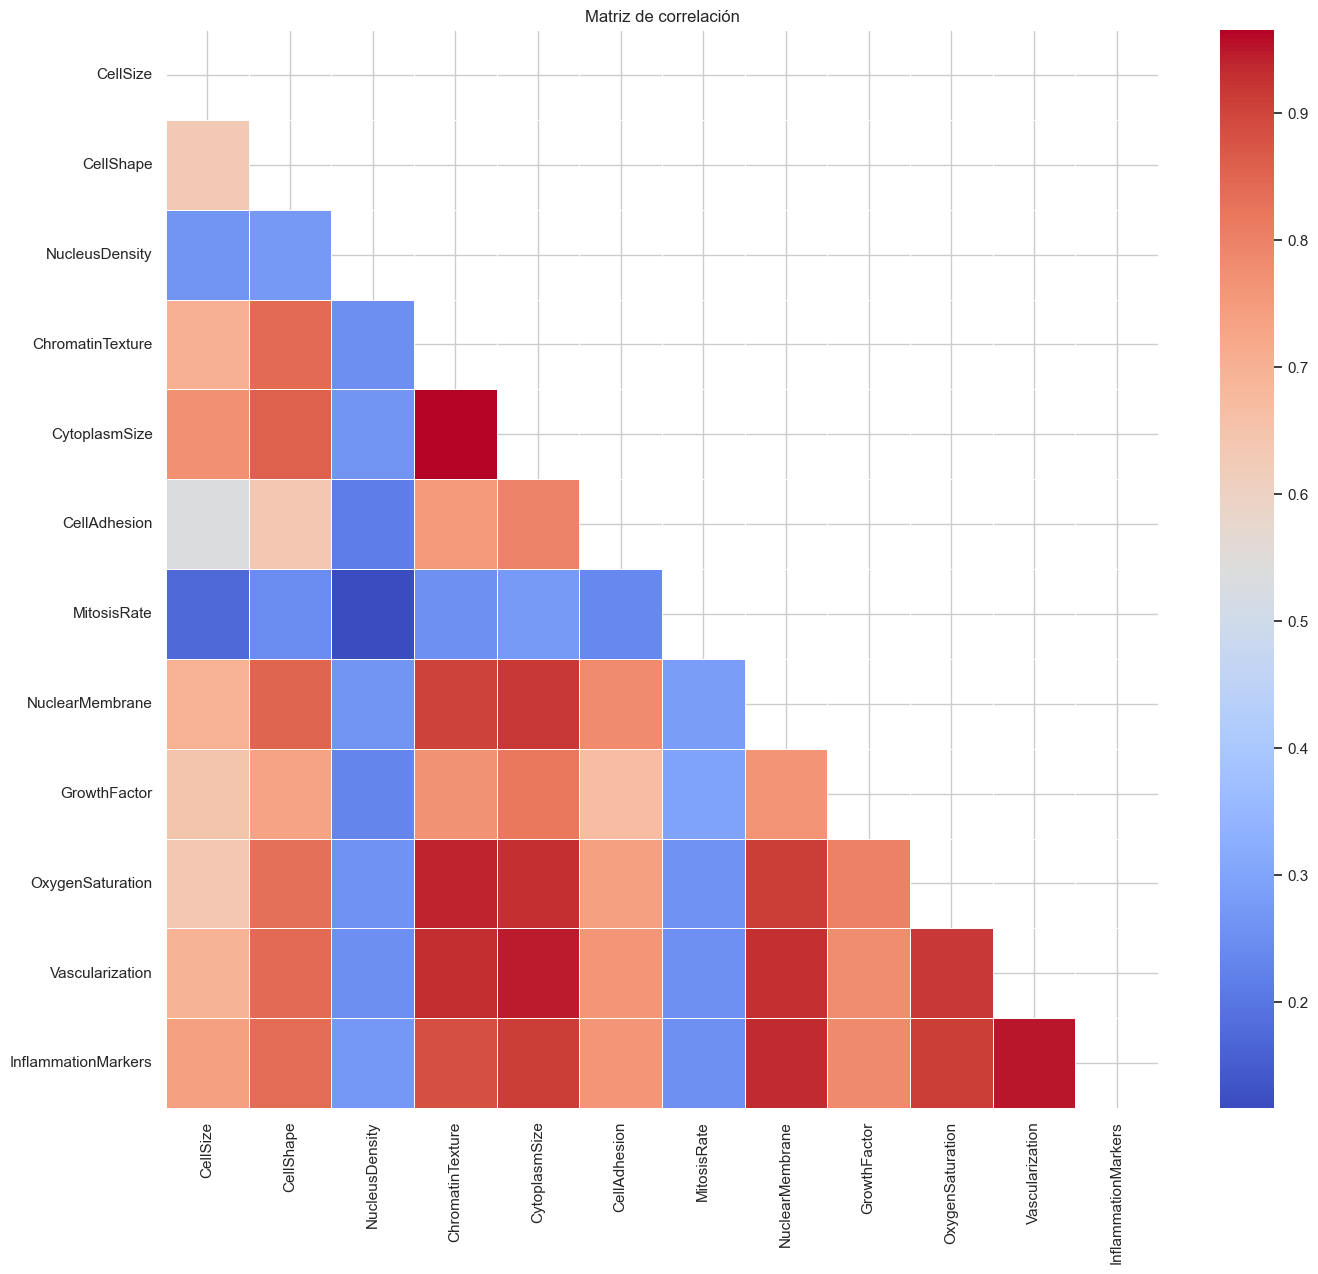

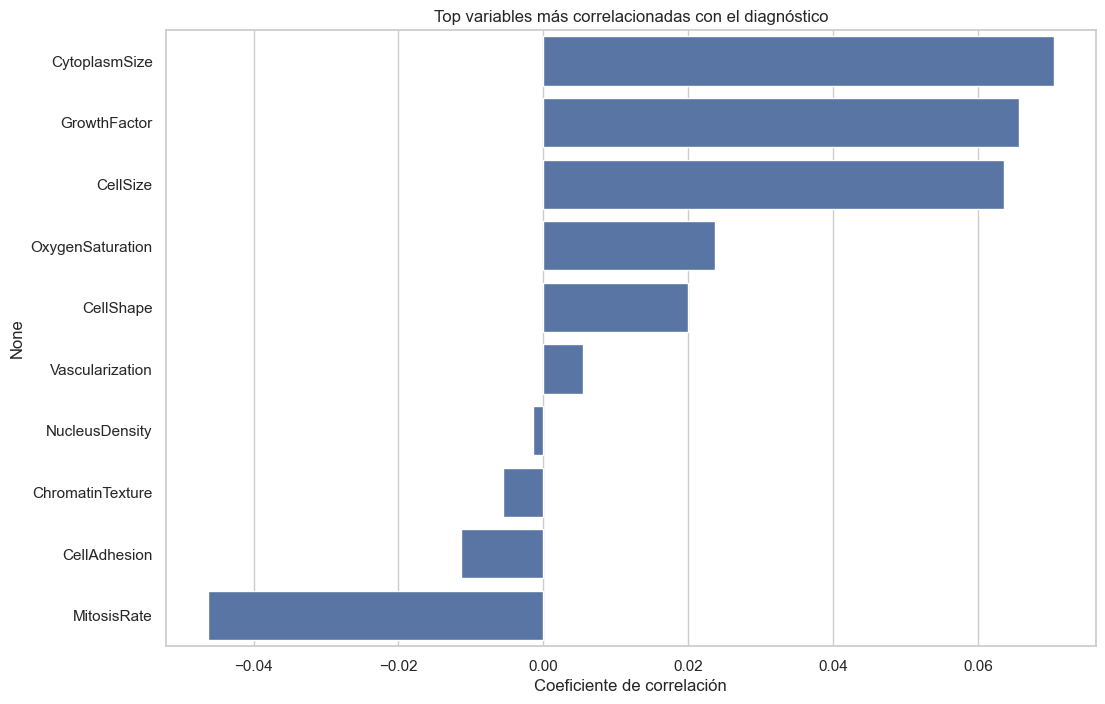

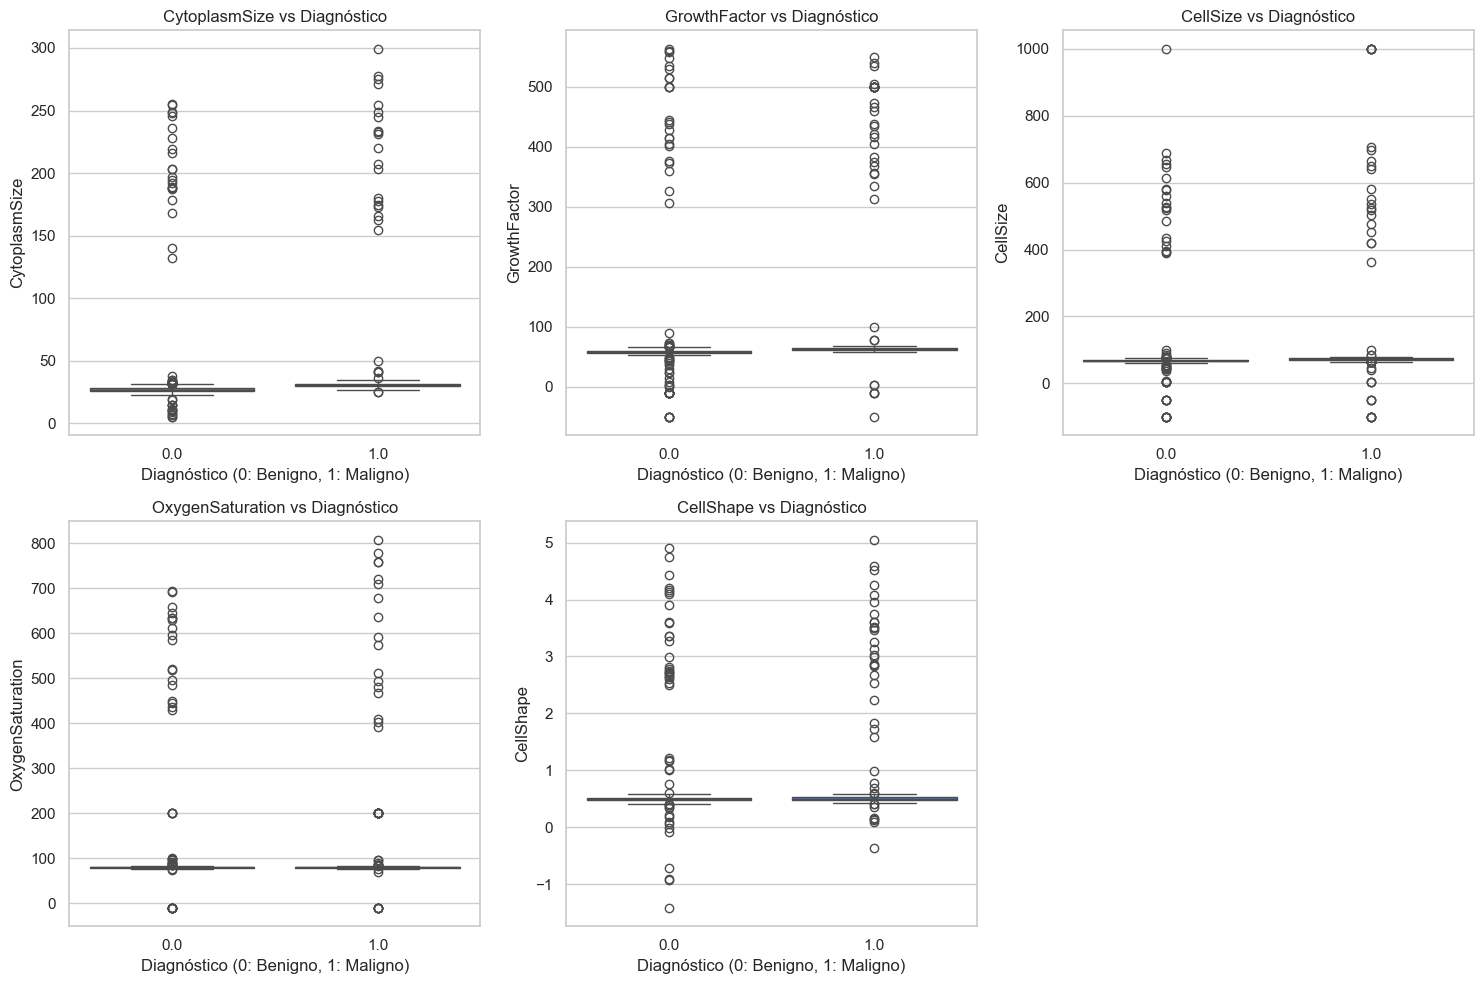

In [4]:
# Comenzamos con el análisis del dataset
display(Markdown("### Análisis del dataset de desarrollo"))

# Información general del dataset
display(Markdown("#### Información general del dataset"))
pretty_print_df(pd.DataFrame({
    'Columnas': cell_balanced_dev.columns,
    'Tipo de dato': cell_balanced_dev.dtypes,
    'No nulos': cell_balanced_dev.count()
}), title="Información del dataset")

# Estadísticas descriptivas
display(Markdown("#### Estadísticas descriptivas"))
pretty_print_df(cell_balanced_dev.describe(), title="Estadísticas descriptivas")

# Verificamos valores faltantes
display(Markdown("#### Valores faltantes por columna"))
missing_values = cell_balanced_dev.isnull().sum()
missing_percent = (missing_values / len(cell_balanced_dev)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
pretty_print_df(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False), index=True)

# Verificamos la distribución de la variable objetivo (Diagnosis)
display(Markdown("#### Distribución de la variable objetivo (Diagnosis)"))
target_distribution = cell_balanced_dev['Diagnosis'].value_counts()
pretty_print_df(pd.DataFrame({
    'Diagnosis': target_distribution.index,
    'Cantidad': target_distribution.values,
    'Porcentaje': (target_distribution.values / len(cell_balanced_dev) * 100).round(2)
}))

# Visualizamos la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diagnosis', data=cell_balanced_dev)
plt.title('Distribución de la variable objetivo (Diagnosis)')
plt.xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
plt.ylabel('Cantidad de muestras')

# Añadimos etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Analizamos la distribución de las variables categóricas
categorical_features = ['CellType', 'GeneticMutation']
display(Markdown("#### Distribución de variables categóricas"))

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=feature, data=cell_balanced_dev, hue='Diagnosis')
    plt.title(f'Distribución de {feature} por diagnóstico')
    plt.xlabel(feature)
    plt.ylabel('Cantidad de muestras')
    
    # Añadimos etiquetas con los valores exactos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

# Analizamos la distribución de las variables numéricas
numeric_features = cell_balanced_dev.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Diagnosis' in numeric_features:
    numeric_features.remove('Diagnosis')

# Creamos histogramas para cada variable numérica
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:12], 1):  # Limitamos a 12 features por figura
    plt.subplot(4, 3, i)
    sns.histplot(cell_balanced_dev[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()

# Si hay más de 12 features, creamos otra figura
if len(numeric_features) > 12:
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numeric_features[12:], 1):
        plt.subplot(4, 3, i)
        sns.histplot(cell_balanced_dev[feature], kde=True)
        plt.title(f'Distribución de {feature}')
    plt.tight_layout()

# Identificamos posibles outliers usando boxplots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=cell_balanced_dev[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()

# Si hay más de 12 features, creamos otra figura para boxplots
if len(numeric_features) > 12:
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numeric_features[12:], 1):
        plt.subplot(4, 3, i)
        sns.boxplot(y=cell_balanced_dev[feature])
        plt.title(f'Boxplot de {feature}')
    plt.tight_layout()

# Analizamos la correlación entre variables numéricas
display(Markdown("#### Matriz de correlación"))
correlation_matrix = cell_balanced_dev[numeric_features].corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Matriz de correlación')

# Identificamos las variables más correlacionadas con el target
if 'Diagnosis' in cell_balanced_dev.columns:
    # Calculamos la correlación de cada feature con el target
    target_correlations = cell_balanced_dev[numeric_features + ['Diagnosis']].corr()['Diagnosis'].sort_values(ascending=False)
    display(Markdown("#### Correlación de las variables con el target (Diagnosis)"))
    pretty_print_df(target_correlations,index=True)

    # Visualizamos las 10 variables más correlacionadas con el target (o todas si hay menos de 10)
    plt.figure(figsize=(12, 8))
    top_correlations = target_correlations[1:min(11, len(target_correlations))]  # Excluimos la correlación del target consigo mismo
    sns.barplot(x=top_correlations.values, y=top_correlations.index)
    plt.title('Top variables más correlacionadas con el diagnóstico')
    plt.xlabel('Coeficiente de correlación')

# Visualizamos la relación entre las variables más correlacionadas y el target
if 'Diagnosis' in cell_balanced_dev.columns:
    top_features = target_correlations[1:6].index.tolist()  # Top 5 features
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(top_features, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='Diagnosis', y=feature, data=cell_balanced_dev)
        plt.title(f'{feature} vs Diagnóstico')
        plt.xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
    plt.tight_layout()

# Análisis de valores extremos (outliers)
display(Markdown("#### Detección de outliers en variables numéricas"))
outliers_data = []
for feature in numeric_features:
    Q1 = cell_balanced_dev[feature].quantile(0.25)
    Q3 = cell_balanced_dev[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((cell_balanced_dev[feature] < lower_bound) | (cell_balanced_dev[feature] > upper_bound)).sum()
    if outliers > 0:
        outliers_data.append({
            'Variable': feature,
            'Outliers': outliers,
            'Porcentaje': f"{(outliers/len(cell_balanced_dev)*100):.2f}%"
        })

pretty_print_df(pd.DataFrame(outliers_data), title="Detección de outliers")

display(Markdown("Análisis exploratorio completado. Se han generado visualizaciones en la carpeta del proyecto."))

In [5]:
display(Markdown("## Entrenamiento y Evaluación del Modelo de Regresión Logística"))

# Importamos las clases y funciones necesarias
from Problema_1.src.models import LogisticRegression

# Separamos features y target
X = cell_balanced_dev.drop('Diagnosis', axis=1)
y = cell_balanced_dev['Diagnosis']

X = handle_outliers(X)
y = handle_outliers(pd.DataFrame(y))

# Manejamos valores faltantes
display(Markdown("#### Manejo de valores faltantes"))
X = handle_missing_values(X)
y = handle_missing_values(pd.DataFrame(y))

# Mostramos estadísticas básicas de las variables numéricas
display(Markdown("#### Estadísticas descriptivas de las variables numéricas"))
numeric_stats = X.describe()
pretty_print_df(numeric_stats,index=True)


# Aplicamos one-hot encoding a las variables categóricas
display(Markdown("#### Aplicando one-hot encoding"))
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Columnas categóricas: {categorical_columns}")
X = one_hot_encoding(X, categorical_columns)
X = X.drop(columns=['CellType_nan', 'GeneticMutation_Absnt'])
print(f"Nuevo shape de X después de one-hot encoding: {X.shape}")

# Mostramos las columnas antes y después del one-hot encoding
display(Markdown("#### Comparación de columnas antes y después del one-hot encoding"))

# Crear DataFrame con la información
comparison_data = {
    'Columnas originales': categorical_columns,
    'Columnas después de one-hot': [col for col in X.columns if col.startswith(tuple(categorical_columns))]
}

# Asegurar que ambas listas tengan la misma longitud para el DataFrame
max_len = max(len(comparison_data['Columnas originales']), len(comparison_data['Columnas después de one-hot']))
comparison_data['Columnas originales'].extend([''] * (max_len - len(comparison_data['Columnas originales'])))
comparison_data['Columnas después de one-hot'].extend([''] * (max_len - len(comparison_data['Columnas después de one-hot'])))

# Dividimos los datos en train y validation
dev = pd.concat([X, y], axis=1)
train_df, val_df = train_val_split(dev, test_size=0.2)

train_norm, val_norm, params = min_max_normalize(train_df, val_df, numeric_features)

# Crear y mostrar el DataFrame
comparison_df = pd.DataFrame(comparison_data)
pretty_print_df(comparison_df, title="Comparación de columnas antes y después del one-hot encoding")

# Guardamos el dataset procesado
display(Markdown("#### Guardando el dataset procesado"))

# Guardamos los datasets procesados
train_norm.to_csv('Problema_1/data/processed/train.csv', index=False)
val_norm.to_csv('Problema_1/data/processed/val.csv', index=False)

print("Datasets guardados exitosamente")

X_train = train_norm.drop('Diagnosis', axis=1)
y_train = train_norm['Diagnosis']
X_val = val_norm.drop('Diagnosis', axis=1)
y_val = val_norm['Diagnosis']


## Entrenamiento y Evaluación del Modelo de Regresión Logística

Columna 'CellSize': 83 outliers (4.99%)
Columna 'CellShape': 77 outliers (4.63%)
Columna 'NucleusDensity': 108 outliers (6.49%)
Columna 'ChromatinTexture': 53 outliers (3.19%)
Columna 'CytoplasmSize': 58 outliers (3.49%)
Columna 'CellAdhesion': 76 outliers (4.57%)
Columna 'MitosisRate': 105 outliers (6.31%)
Columna 'NuclearMembrane': 72 outliers (4.33%)
Columna 'GrowthFactor': 90 outliers (5.41%)
Columna 'OxygenSaturation': 81 outliers (4.87%)
Columna 'Vascularization': 66 outliers (3.97%)
Columna 'InflammationMarkers': 50 outliers (3.01%)


#### Manejo de valores faltantes

#### Estadísticas descriptivas de las variables numéricas

|       |   CellSize |    CellShape |   NucleusDensity |   ChromatinTexture |   CytoplasmSize |   CellAdhesion |   MitosisRate |   NuclearMembrane |   GrowthFactor |   OxygenSaturation |   Vascularization |   InflammationMarkers |
|:------|-----------:|-------------:|-----------------:|-------------------:|----------------:|---------------:|--------------:|------------------:|---------------:|-------------------:|------------------:|----------------------:|
| count | 1663       | 1663         |     1663         |         1663       |      1663       |   1663         |   1663        |       1663        |     1663       |         1663       |       1663        |            1663       |
| mean  |   69.6374  |    0.499631  |        1.44002   |           22.0204  |        28.3891  |      0.474514  |      3.08122  |          2.38471  |       60.5914  |           80.0017  |          5.05061  |              40.6141  |
| std   |    3.47315 |    0.0270283 |        0.0513649 |            1.01801 |         2.24926 |      0.0235466 |      0.315357 |          0.161478 |        2.79854 |            1.15873 |          0.352642 |               3.77707 |
| min   |   55.5979  |    0.389644  |        1.19897   |           17.7073  |        18.7948  |      0.369101  |      1.66517  |          1.71592  |       47.8955  |           75.5829  |          3.82766  |              29.2306  |
| 25%   |   67.209   |    0.484691  |        1.4049    |           21.4186  |        26.6094  |      0.461223  |      2.81312  |          2.26346  |       58.7661  |           79.3134  |          4.85192  |              37.8687  |
| 50%   |   69.6551  |    0.49944   |        1.43852   |           22.012   |        28.3899  |      0.474648  |      3.07162  |          2.38708  |       60.6649  |           80.0091  |          5.05155  |              40.6082  |
| 75%   |   71.8965  |    0.514885  |        1.47688   |           22.5805  |        30.1037  |      0.488476  |      3.34906  |          2.5067   |       62.5034  |           80.6434  |          5.24818  |              43.2389  |
| max   |   86.0764  |    0.597133  |        1.69533   |           25.9657  |        37.6144  |      0.56993   |      4.62004  |          3.14381  |       73.5033  |           86.0423  |          6.73382  |              55.796   |

#### Aplicando one-hot encoding

Columnas categóricas: ['CellType', 'GeneticMutation']
Nuevo shape de X después de one-hot encoding: (1663, 16)


#### Comparación de columnas antes y después del one-hot encoding

c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP2\Problema_1\src\preprocessing.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = (train_df[col] - min_val) / (max_val - min_val)
c:\Users\Matteo\Documents\Facultad\tercero\primercuatri\ML\ML\Musacchio_Matteo_TP2\Problema_1\src\preprocessing.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[col] = (val_df[col] - min_val) / (max_val - min_val)


### Comparación de columnas antes y después del one-hot encoding

| Columnas originales   | Columnas después de one-hot   |
|:----------------------|:------------------------------|
| CellType              | CellType_Epthlial             |
| GeneticMutation       | CellType_???                  |
|                       | CellType_Mesnchymal           |
|                       | GeneticMutation_Presnt        |

#### Guardando el dataset procesado

Datasets guardados exitosamente


#### Shape después del split

X_train shape: (1330, 16)
X_val shape: (333, 16)
y_train shape: (1330,)
y_val shape: (333,)


### Búsqueda del mejor lambda basado en F1-Score

### Resultados de la búsqueda de lambda

|   Lambda |   F1-Score |
|---------:|-----------:|
|    0.001 |   0.697479 |
|    0.01  |   0.680851 |
|    0.1   |   0.444444 |
|    1     |   0        |


Mejor lambda encontrado: 0.001 (F1-Score: 0.6975)


### Modelo Final

#### Verificación de pesos del modelo

| Feature             |   Coeficiente |
|:--------------------|--------------:|
| intercept           |    0.00406653 |
| CellSize            |    0.308431   |
| CellShape           |    0.0291348  |
| NucleusDensity      |   -0.364356   |
| ChromatinTexture    |    0.0274063  |
| CytoplasmSize       |    0.381244   |
| CellAdhesion        |    0.00416061 |
| MitosisRate         |   -0.347085   |
| NuclearMembrane     |   -0.365979   |
| GrowthFactor        |    0.317623   |
| OxygenSaturation    |   -0.00301556 |
| Vascularization     |   -0.00331873 |
| InflammationMarkers |   -0.41868    |
| CellType_Epthlial   |   -0.0552834  |
| CellType_???        |    0.0266479  |

*Mostrando 15 de 17 filas*

#### Métricas del Modelo Final

### Métricas del modelo final

| Métrica   |    Valor |
|:----------|---------:|
| Accuracy  | 0.783784 |
| Precision | 0.85567  |
| Recall    | 0.588652 |
| F1-Score  | 0.697479 |
| AUC-ROC   | 0.934102 |
| AUC-PR    | 0.869268 |

#### Matriz de Confusión

### Matriz de confusión

|               |   Predicción Negativa |   Predicción Positiva |
|:--------------|----------------------:|----------------------:|
| Real Negativa |                   178 |                    14 |
| Real Positiva |                    58 |                    83 |

#### Curvas de Evaluación

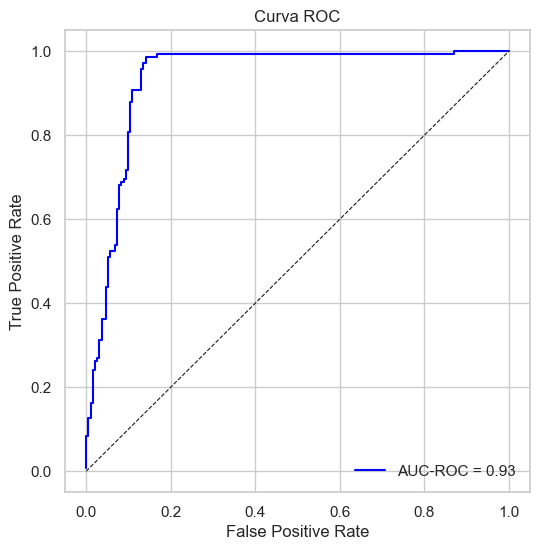

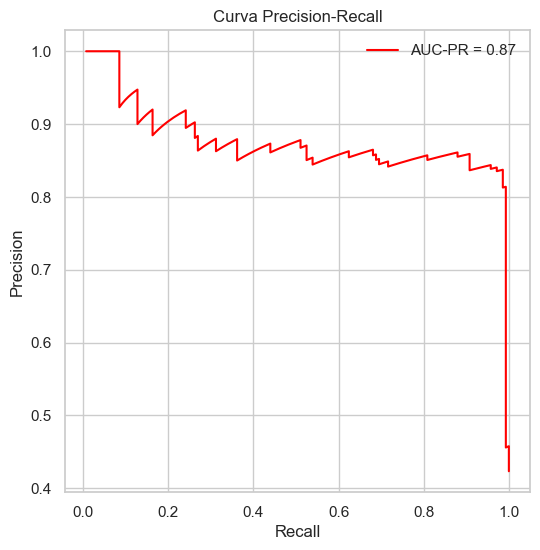

In [7]:


# Debugging: Verificar split
display(Markdown("#### Shape después del split"))
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# Convertimos a arrays de numpy y nos aseguramos de que sean float64
# X_train = X_train.values.astype(np.float64)
# X_val = X_val.values.astype(np.float64)
# y_train = y_train.values.astype(np.float64)
# y_val = y_val.values.astype(np.float64)

lambda_values = [0.001, 0.01, 0.1, 1.0]

# Inicializamos variables para encontrar el mejor lambda
best_fscore = 0
best_lambda = None

# Probamos diferentes valores de lambda
display(Markdown("### Búsqueda del mejor lambda basado en F1-Score"))
results = []

for lambda_val in lambda_values:
    # Entrenamos el modelo con el lambda actual
    model = LogisticRegression(X_train, y_train, l2=lambda_val)
    model.fit_gradient_descent()
    
    # Evaluamos el modelo
    metrics = model.evaluate(X_val, y_val)
    fscore = metrics['F1-Score']
    
    # Guardamos los resultados
    results.append({
        'Lambda': lambda_val,
        'F1-Score': fscore
    })
    
    # Actualizamos el mejor lambda si encontramos un mejor F1-Score
    if fscore > best_fscore:
        best_fscore = fscore
        best_lambda = lambda_val

# Mostramos los resultados
results_df = pd.DataFrame(results)
pretty_print_df(results_df, title="Resultados de la búsqueda de lambda")

print(f"\nMejor lambda encontrado: {best_lambda} (F1-Score: {best_fscore:.4f})")

# Entrenamos el modelo final con el mejor lambda
display(Markdown("### Modelo Final"))
final_model = LogisticRegression(X_train, y_train, l2=best_lambda)
final_model.fit_gradient_descent()

# Debugging: Verificar pesos del modelo
display(Markdown("#### Verificación de pesos del modelo"))
final_model.print_coefficients()

# Evaluamos el modelo final
final_metrics = final_model.evaluate(X_val, y_val)

# Mostramos las métricas finales
display(Markdown("#### Métricas del Modelo Final"))
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR'],
    'Valor': [
        final_metrics['Accuracy'],
        final_metrics['Precision'],
        final_metrics['Recall'],
        final_metrics['F1-Score'],
        final_metrics['AUC-ROC'],
        final_metrics['AUC-PR']
    ]
})
pretty_print_df(metrics_df, title="Métricas del modelo final")

# Mostramos la matriz de confusión
display(Markdown("#### Matriz de Confusión"))
conf_matrix = pd.DataFrame(
    final_metrics['Matriz de Confusión'],
    columns=['Predicción Negativa', 'Predicción Positiva'],
    index=['Real Negativa', 'Real Positiva']
)
pretty_print_df(conf_matrix, title="Matriz de confusión",index=True)

# Graficamos las curvas ROC y PR
display(Markdown("#### Curvas de Evaluación"))
final_model.plot_curves(X_val, y_val)